# Scan analysis - shap

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [2]:
import pandas as pd

import itertools

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from xgboost import XGBRegressor
import shap


from plots2.fns import (
    get_corner_annotations
)


from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
)

from poly2.utils import (
    get_dispersal_kernel, trait_vec, beta_dist, gamma_dist,
    get_dist_var, get_dist_mean, edge_values
)
from poly2.shap import get_shap_values
from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

C:\Users\user\anaconda3\envs\poly2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df = pd.read_csv('../outputs/combined/scan_all.csv')

In [4]:
df_use = df.loc[lambda x: (x.run<8000)]

X = (
    df_use
    .drop([
        'best_dose',
        'n_pos_diff',
        'run'
    ], axis=1)
    .rename(columns = {
        'dec_rate_multiplier': 'dec_rate',
        'm_prop_multiplier': 'm_prop',
        'm_scale_multiplier': 'm_scale',
        'asymptote': 'asymp',
    })
)

# y = df_use.loc[:, ['run', 'best_dose']]

In [5]:
X.head()

,year,in_0p0_0p1,in_0p1_0p2,in_0p2_0p3,in_0p3_0p4,in_0p4_0p5,in_0p5_0p6,in_0p6_0p7,in_0p7_0p8,in_0p8_0p9,in_0p9_1p0,mu,b,asymp,dec_rate,m_prop,m_scale,ME_var,ME_mean
0,1,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
1,2,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
2,3,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
3,4,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
4,5,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241


# Load XGBoost model

In [ ]:
%%time

X_use = X

shap_values = get_shap_values(X_use)

________________________________________________________________________________
[Memory] Calling poly2.shap.get_shap_values...
get_shap_values(        year  in_0p0_0p1    in_0p1_0p2    in_0p2_0p3    in_0p3_0p4  \
0          1         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
1          2         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
2          3         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
3          4         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
4          5         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
...      ...         ...           ...           ...           ...   
279995    31         1.0  1.822585e-27  1.185531e-35  1.405050e-42   
279996    32         1.0  1.822585e-27  1.185531e-35  1.405050e-42   
279997    33         1.0  1.822585e-27  1.185531e-35  1.405050e-42   
...)
start


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


# Plots

In [14]:
cf = Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
asymptote = None
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None



In [15]:
a = cf.k_mu*cf.k_b
b = cf.k_b

init_dist = gamma_dist(cf.n_k, a, b)


asymptote = 1

#
# * in trait space, get mean and variance

tv = trait_vec(cf.n_k)
# NB get_dist_var/mean needs init_dist to be shape (n_k, n_years)
reshaped = init_dist.reshape((cf.n_k, 1))
tv_var = get_dist_var(reshaped, tv)[0]
tv_mean = get_dist_mean(reshaped, tv)[0]

# NB max_effect = 1 - w + w * exp(-curv)
#               = 1 - w + w * k
max_effect_mean = 1 - asymptote + asymptote * tv_mean
max_effect_var = (asymptote**2) * tv_var

ev = edge_values(10)
dist_summary = gamma_dist(10, a, b)

TypeError: list indices must be integers or slices, not tuple

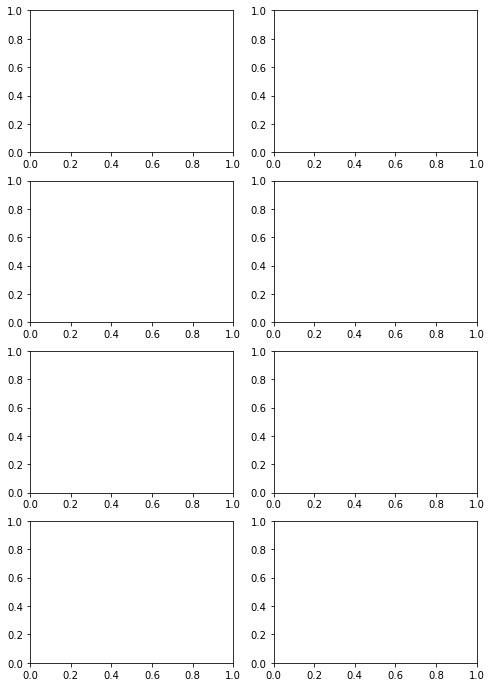

In [16]:
plt.close('all')

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title


f, ax = plt.subplots(4, 2, figsize=(8, 12))

shap.plots.scatter(shap_values[:, "year"],       hist=False, ax=ax[0][0], show=False) # color=shap_values,
shap.plots.scatter(shap_values[:, "in_0p1_0p2"], hist=False, ax=ax[0][1], show=False)

shap.plots.scatter(shap_values[:, "asymp"],    hist=False, ax=ax[1][0], show=False)
shap.plots.scatter(shap_values[:, "dec_rate"], hist=False, ax=ax[1][1], show=False)

shap.plots.scatter(shap_values[:, "ME_mean"], hist=False, ax=ax[2][0], show=False)
shap.plots.scatter(shap_values[:, "ME_var"],  hist=False, ax=ax[2][1], show=False)

shap.plots.scatter(shap_values[:, "m_scale"], hist=False, ax=ax[3][0], show=False)
shap.plots.scatter(shap_values[:, "m_prop"],  hist=False, ax=ax[3][1], show=False)

# LAYOUT

ax[0][0].set_xlabel('Year')
ax[0][1].set_xlabel('Density, box 2')

ax[1][0].set_xlabel('Asymptote')
ax[1][1].set_xlabel('Decay rate multiplier')

ax[2][0].set_xlabel('Max effect, mean')
ax[2][1].set_xlabel('Max effect, variance')

ax[3][0].set_xlabel('Mutation scale multiplier')
ax[3][1].set_xlabel('Mutation proportion multiplier')


ax[0][0].set_ylabel('Shap value')
ax[0][1].set_ylabel('Shap value')

ax[1][0].set_ylabel('Shap value')
ax[1][1].set_ylabel('Shap value')

ax[2][0].set_ylabel('Shap value')
ax[2][1].set_ylabel('Shap value')

ax[3][0].set_ylabel('Shap value')
ax[3][1].set_ylabel('Shap value')



# ax[0][0].set_xlabel('Year')
# ax[0][1].set_xlabel('in_0p0_0p1')

ax[1][0].set_xlim([-0.05,1.05])
ax[1][1].set_xlim([0, 3])

ax[2][0].set_xlim([-0.05,1.05])
# ax[2][1].set_xlabel('Max effect, variance')

ax[3][0].set_xlim([-0.5,10])
ax[3][1].set_xlim([-0.5,10])

for ii, jj in itertools.product(np.arange(4), np.arange(2)):
    ax[ii][jj].spines['top'].set_visible(True)
    ax[ii][jj].spines['right'].set_visible(True)

    
    
ax[0][1].axvline(dist_summary[1], color='r', ls='--', lw=3)

ax[1][0].axvline(1, color='r', ls='--', lw=3)
ax[1][1].axvline(1, color='r', ls='--', lw=3)

ax[2][0].axvline(max_effect_mean, color='r', ls='--', lw=3)
ax[2][1].axvline(max_effect_var, color='r', ls='--', lw=3)

ax[3][0].axvline(1, color='r', ls='--', lw=3)
ax[3][1].axvline(1, color='r', ls='--', lw=3)


f.patch.set_facecolor('white')

f.align_ylabels()

plt.tight_layout(rect=[0, 0, 1, 0.99], h_pad=2, w_pad=4)

get_corner_annotations(2, 4, 0.1, 0.98, 0.52, 0.245, plt)

In [21]:
f.savefig('../figures/paper/fig5.jpg', dpi=300, bbox_inches="tight")